In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [13]:
df = pd.read_csv("UkElectricity_2023.csv")

In [14]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)

In [15]:
df['Price_lag1'] = df['Price'].shift(1)
df['Price_lag2'] = df['Price'].shift(2)
df['Price_lag3'] = df['Price'].shift(3)
df.dropna(inplace=True)

In [16]:
X = df[['Price_lag1', 'Price_lag2', 'Price_lag3']]
y = df['Price']
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [17]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=200)

In [18]:
predictions = model.predict(X_test)

In [19]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 3.02
Mean Squared Error (MSE): 27.52
Root Mean Squared Error (RMSE): 5.25


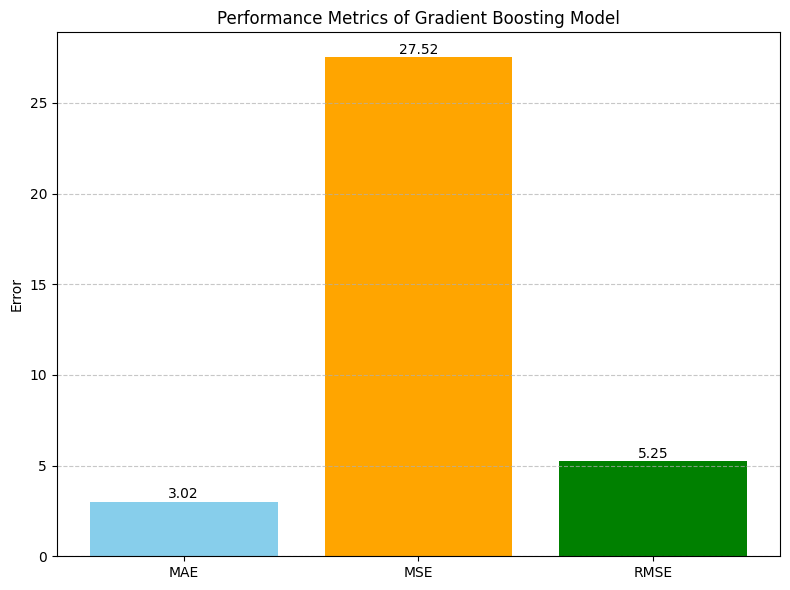

In [20]:
metrics = ['MAE', 'MSE', 'RMSE']
values = [mae, mse, rmse]
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['skyblue', 'orange', 'green'])
plt.title('Performance Metrics of Gradient Boosting Model')
plt.ylabel('Error')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
